In [293]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [294]:
df = pd.read_csv('universitydatasets.csv', encoding='latin1')
df_copy = df.copy()

## Cleaning Data frame

In [296]:
columns = {}

for col_name in df.columns:
    new_name = col_name.replace('\xa0', ' ')
    columns[col_name] = new_name.strip()
df.rename(columns=columns, inplace=True)

## <center>  Objectives</center>
## Rankings Analysis
1. **Correlation between World Rank and National Rank:** 
   - Use scatter plots and calculate Pearson correlation coefficient to understand how closely a university's world rank aligns with its national rank. This can provide insights into the global standing of universities within their respective countries.

2. **Regional Comparison of Scores:** 
   - Group universities by regions or countries and compare their average scores. This can reveal disparities in educational quality and research output across different parts of the world.

3. **Top Universities by Criteria:** 
   - Identify the top universities based on specific criteria such as quality of education, alumni employment, or research output. This can help stakeholders understand which universities excel in different a
## Geographical Analysis
1. **Regional Rank Distribution:** 
   - Plot histograms or box plots of university ranks for different regions. This can reveal regional disparities in rankings and shed light on factors influencing university performance in specific geographic areas.

2. **Cluster Analysis of University Locations:** 
   - Apply clustering algorithms such as K-means to group universities based on their geographic proximity. This can uncover patterns in university distribution and identify regions with similar characteristics.
lar characteristics.

## Correlation Analysis
1. **Correlation Matrix of Quality Metrics:** 
   - Compute a correlation matrix of quality metrics (education, faculty, research output, etc.) and overall scores. Visualize the matrix using a heatmap to identify which metrics are most strongly correlated with university rankings.

2. **Regression Analysis:** 
   - Perform regression analysis to quantify the impact of individual quality metrics on university scores. This can help prioritize areas for improvement and inform strategic decision-making by university administrators.

## Quality Metrics
1. **Score Distribution by Quality Metrics:** 
   - Plot histograms or box plots of university scores grouped by different quality metrics. This can reveal how variations in education quality, faculty competence, etc., affect overall university performance.

2. **Factor Importance Analysis:** 
   - Use techniques like feature importance in machine learning models or principal component analysis (PCA) to determine which quality metrics contribute most to university rankings. This can guide efforts to enhance key performance indicators and boost rankings.

## Influence Analysis
1. **Influence vs. Ranking Scatter Plot:** 
   - Create a scatter plot comparing university influence (measured by citations or other metrics) with their rankings. Identify outliers or universities with disproportionately high influence relative to their rankings, and investigate potential factors driving their influence.

2. **Citation Network Analysis:** 
   - Construct a citation network among universities based on their research output. Analyze network centrality measures to identify influential universities that play key roles in knowledge dissemination and collaboration within the academic community.


In [304]:
df.head()

,World Rank,Institution,Location,National Rank,Quality of Education,Alumni Employment,Quality of Faculty,Research Output,Quality Publications,Influence,Citations,Score
0,1,Harvard University,USA,1,2,1,1,1,1,1,1,100.0
1,2,Stanford University,USA,2,10,3,2,10,4,3,2,96.7
2,3,Massachusetts Institute of Technology,USA,3,3,11,3,30,15,2,6,95.1
3,4,University of Cambridge,United Kingdom,1,5,19,6,12,8,6,19,94.0
4,5,University of Oxford,United Kingdom,2,9,25,10,9,5,7,4,93.2


### Rankings Analysis
**1. Correlation between World Rank and National Rank:**
### Analysis Overview

In this analysis, we explored the correlation between a university's world rank and its national rank to understand the global standing of universities within their respective countries. We utilized scatter plots to visualize the relationship between these ranks and calculated the Pearson correlation coefficient to quantify the strength of the correlation.#

### Purpose
The purpose of this analysis is to:

- Investigate how closely a university's world rank aligns with its national rank.
- Assess the consistency of a university's performance on a global scale compared to its performance within its country.
- Provide insights into the global reputation and standing of universities based on their national rank#ings.

### Methodology
We employed scatter plots to visualize the relationship between world rank and national rank, with each data point representing a university. Additionally, we calculated the Pearson correlation coefficient to determine the strength and direction of the linear relationship between the ranks. A higher correlation coefficient indicates a stronger alignment between world and national# ranks.

### Pearson Correlation Coefficient
The Pearson correlation coefficient calculated for this analysis# is 0.31. 

### Explanation
A Pearson correlation coefficient of 0.31 indicates a positive but weak correlation between a university's world rank and its national rank. This suggests that there is some degree of alignment between a university's performance on a global scale and its performance within its country, but the relationship is not very strong. Universities with higher national ranks tend to have slightly higher world ranks, and vice versa, but there are nota#ble variations. 

### Conclusion
Through this analysis, we gain insights into the relationship between a university's global standing and its national recognition. While there is a positive correlation between world and national ranks, it is important to recognize that other factors beyond national recognition may influence a university's global standing. Understanding this correlation can help policymakers, educators, and stakeholders make informed decisions to enhance the global reputation and competitiveness of universities.


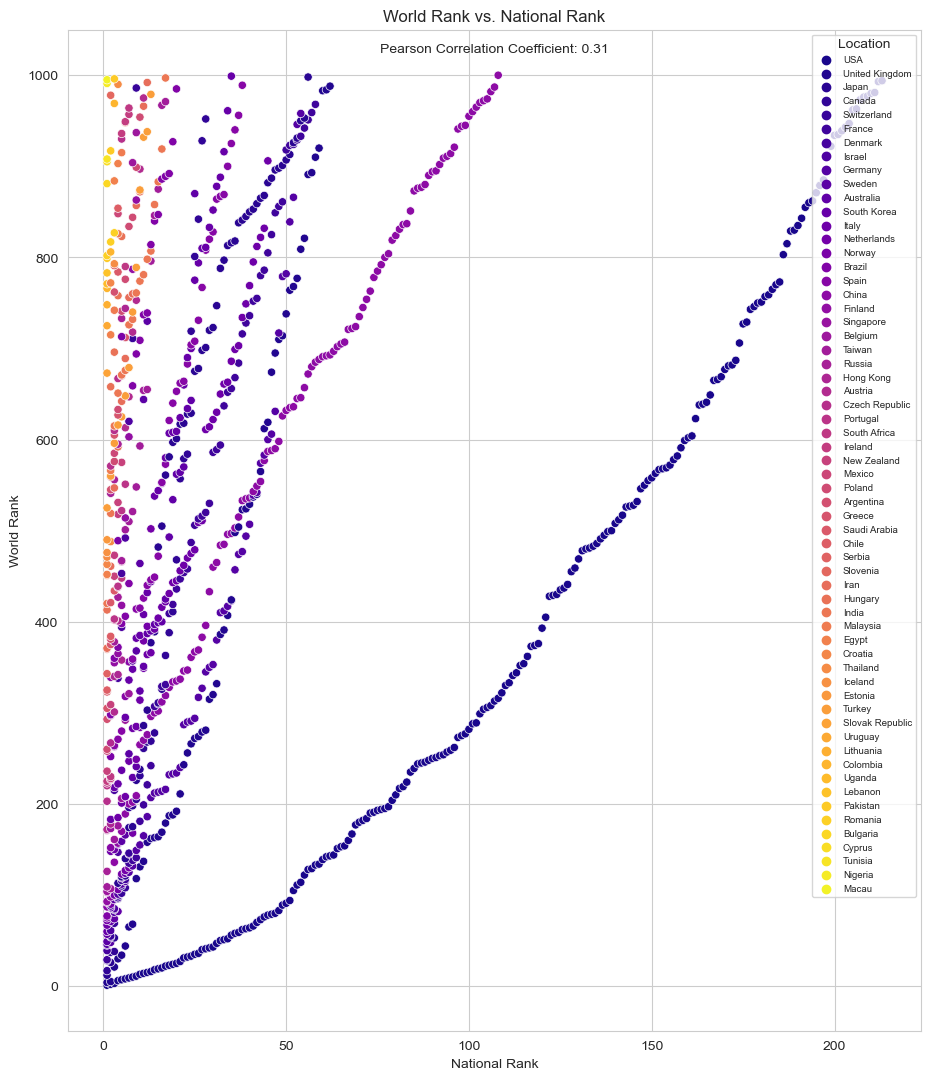

In [300]:
plt.figure(figsize=(11, 13))
sns.scatterplot(x='National Rank', y='World Rank', data=df, hue='Location', palette='plasma')
plt.title('World Rank vs. National Rank')
plt.xlabel('National Rank')
plt.ylabel('World Rank')
plt.legend(title='Location', loc='upper right', fontsize='x-small')
correlation_coefficient = df['World Rank'].corr(df['National Rank'])
plt.text(0.5, 0.98, f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}", ha='center', va='center', transform=plt.gca().transAxes)
plt.grid(True)

## Rankings Analysis

**2. Regional Comparison of Scores**

   - Group universities by regions or countries and compare their average scores. This can reveal disparities in educational quality and research output across different parts of the world.
### Analysis Overview

In this analysis, we conducted a regional comparison of university scores to evaluate disparities in educational quality and research output across different countries. The dataset consists of average scores of universities from various countries, allowing us to examine how universities perform in different regions.
#
### Purpose
The purpose of this analysis is to:

- Identify variations in educational quality and research output among universities in different countries.
- Understand the strengths and weaknesses of educational systems across various regions.
- Provide insights for policymakers, educators, and stakeholders to address disparities and improve the quality of education and research glob#ally.

### Methodology
We grouped universities by regions or countries and compared their average scores using a bar plot. We used custom colors to make the visualization aesthetically pleasing and easily interpretable. By analyzing the bar plot, we can gain insights into regional disparities and identify areas for further investigation and impr#ovement.

### Conclusion
This analysis sheds light on the regional differences in university scores and highlights the importance of addressing disparities in educational quality and research output. By understanding these variations, stakeholders can develop targeted strategies to enhance the overall quality of education and research worldwide.


In [301]:
universities_avg_score_by_location = df.groupby('Location')['Score'].mean().sort_values(ascending=False)[0:20]

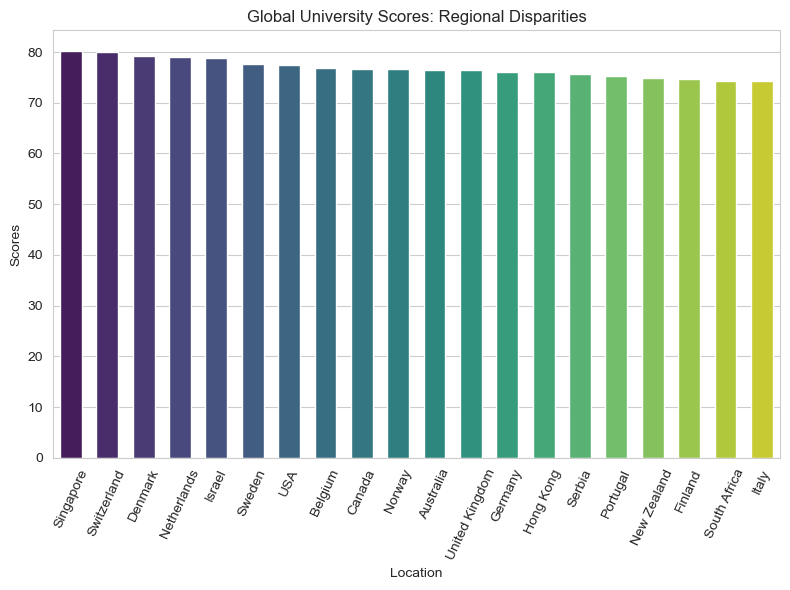

In [302]:
figure = plt.figure(figsize=(8,6))
plt.title('Global University Scores: Regional Disparities')
plt.xlabel('Countries')
plt.ylabel('Scores')
plt.xticks(rotation=65)
sns.barplot(x=universities_avg_score_by_location.index, y=universities_avg_score_by_location.values, palette='viridis', width=0.6)
plt.tight_layout()
plt.show()

## Rankings Analysis
3. **Top Universities by Criteria:** 
   - Identify the top universities based on specific criteria such as quality of education, alumni employment, or research output. This can help stakeholders understand which universities excel in different aspects.

### Analytical Interpretation: Visualization of Top Universities based on Specific Criteria

In this visualization, we present the top universities based on specific criteria using a horizontal bar plot. This visualization serves as a powerful tool for stakeholders to gain insights into the overall excellence of universities across various dimensions.

#### Insights from the Visualization

- **Identification of Top Performers**: The horizontal bar plot allows us to easily identify the top universities that excel across multiple criteria. Universities with longer bars represent higher total scores, indicating superior performance in terms of overall excellence.

- **Comparative Analysis**: By comparing the total scores of universities, stakeholders can discern patterns and trends in the data. They can identify which universities stand out as leaders in specific areas and assess how different institutions perform relative to one another.

- **Understanding University Excellence**: The visualization offers a holistic view of university excellence by considering multiple criteria such as quality of education, alumni employment, research output, and influence. This comprehensive assessment helps stakeholders understand the multifaceted nature of university excellence beyond traditional rankings.

#### Implications of the Data

- **Informing Decision-Making**: Prospective students, employers, and policymakers can use the insights from this visualization to make informed decisions. Prospective students can identify universities that align with their academic and career goals, while employers can target institutions known for producing high-caliber graduates. Policymakers can leverage the data to inform strategic initiatives aimed at enhancing educational quality and research output.

- **Promoting Transparency and Accountability**: By publicly showcasing the performance of universities based on specific criteria, this visualization promotes transparency and accountability in the higher education sector. It empowers stakeholders to hold institutions accountable for their performance and encourages continuous improvement.

- **Driving Innovation and Collaboration**: Recognizing top-performing universities can stimulate competition and drive innovation within the academic community. It can also foster collaboration between universities, industry partners, and government agencies to address global challenges and advance knowledge in various fields.

#### Future Considerations

- **Dynamic Nature of Excellence**: It's essential to acknowledge that university excellence is dynamic and can evolve over time. Stakeholders should regularly reassess the criteria and weights used for evaluation to reflect changing priorities and emerging trends in higher education.

- **Inclusivity and Diversity**: While the visualization highlights top performers, it's crucial to promote inclusivity and diversity in the assessment of university excellence. Future analyses could explore how universities across different regions and demographic profiles fare in terms of achieving excellence and fostering diversity.

- **Continuous Evaluation and Improvement**: Continuous evaluation and improvement are key to maintaining the integrity and relevance of the assessment process. Stakeholders should solicit feedback, incorporate new data sources, and refine analytical methodologies to ensure the accuracy and robustness of future analyses.


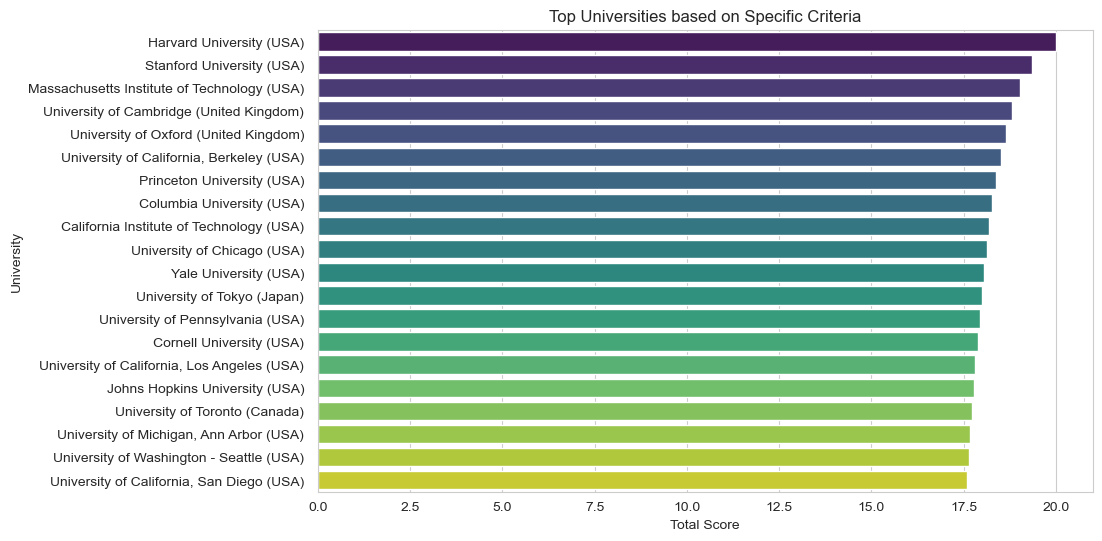

In [303]:
# Function to calculate total score based on weighted criteria
def calculate_total_score(row):
    # Define weights for each criterion (adjust as needed)
    weights = {
        'Quality of Education': 0.15,
        'Alumni Employment': 0.15,
        'Quality of Faculty': 0.1,
        'Research Output': 0.1,
        'Quality Publications': 0.1,
        'Influence': 0.1,
        'Citations': 0.1,
        'Score': 0.2
    }
    # Calculate total score by summing weighted scores for each criterion
    total_score = sum(row[criterion] * weight for criterion, weight in weights.items() if isinstance(row[criterion], (int, float)))
    return total_score

universities = pd.DataFrame(df)
universities['Total_Score'] = universities.apply(calculate_total_score, axis=1)
universities['University'] = universities['Institution'] + ' (' + universities['Location'] + ') '
top_universities = universities.sort_values(by='Total_Score', ascending=False)[0:20]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Score', y='University', data=top_universities, palette='viridis')
plt.xlabel('Total Score')
plt.ylabel('University')
plt.title('Top Universities based on Specific Criteria')
plt.show()

## Geographical Analysis
1. **Heatmap of University Locations:** 
   - Visualize the distribution of universities on a map using tools like Matplotlib or Plotly. This can highlight clusters of high-ranking universities in certain regions and identify areas with fewer top-tier institutions.